#### Pick three algorithms that are implemented in Surprise.

#### One neighborhood algorithm:

- KNNWithMeans: Item or User
- KNNWithZScore:  Item or User
- KNNBaseline: Item or User

#### Two model-based algorithms:
- SVD
- SVDpp
- NMF
- SlopeOne
- CoClustering

Using the Yelp Core 5 data set, tune each algorithm to achieve the best performance on the RMSE metric.

Note that there are quite a few a parameters for some algorithms. Keep careful notes about what parameters you tried and the results that you got. The GridSearchCV method in Surprise can be useful for this.

Note: A better experimental methodology (which we are not using) would be to hold out a validation set for evaluation and tune the algorithms on the rest of the data.

### Part I: Notebook
Once you have determined the best parameters for each algorithm, create a Jupyter notebook showing a 5-fold CV comparison using the best parameters for each. Including a plot comparing the RMSE values.

### Part II: Report
Write a short report (500-750 words) on the tuning process for each algorithm. Describe what values you explored and the results that you got. Including a table with the final set of parameters and your comparative plot from Part I.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from surprise import KNNBasic
from surprise import SVD
from surprise import Dataset
from surprise.model_selection import KFold
from surprise.model_selection import cross_validate
from surprise.model_selection import PredefinedKFold
from surprise.model_selection import train_test_split
from surprise.accuracy import rmse
from surprise import Reader
from surprise import KNNWithMeans
from surprise.model_selection import GridSearchCV
import timeit
import os
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("review.csv")
reader = Reader(rating_scale = (1,5))
data = Dataset.load_from_df(df, reader = reader)

## 1. One neighborhood algorithm:

KNNBaseline: User

In [3]:
from surprise import KNNBaseline

# Setting the cross validation value
cv = KFold(n_splits = 5, random_state = 1,shuffle=False)

# Setting the grid search range for the parameters
param_grid = {'k': list(range(10,100,10)),
              'sim_options': {'name': ['pearson'],
                              'user_based': [True]}}
# Modeling with grid search
gs_knn = GridSearchCV(KNNBaseline, param_grid, measures = ['RMSE'], cv = cv)

# Fitting the data
gs_knn.fit(data)

# Assigning the all the values from the model into a dataframe
df_knn = pd.DataFrame.from_dict(gs_knn.cv_results)

# Selecting only 'parameter' and '5-cv-folds' columns from the result-dataframe
cols = ['params','split0_test_rmse','split1_test_rmse','split2_test_rmse','split3_test_rmse','split4_test_rmse']

# The data frame with the columns
df_knn[cols]

Estimating biases using als...
Computing the pearson similarity matrix...
Estimating biases using als...
Computing the pearson similarity matrix...
Estimating biases using als...
Computing the pearson similarity matrix...
Computing the pearson similarity matrix...
Estimating biases using als...
Done computing similarity matrix.
Done computing similarity matrix.
Done computing similarity matrix.
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson similarity matrix...
Estimating biases using als...
Computing the pearson similarity matrix...
Estimating biases using als...
Computing the pearson similarity matrix...
Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Done computing similarity matrix.
Done computing similarity matrix.
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson similarity matrix...
Estimating biases using als...
Computing the pearson similarit

,params,split0_test_rmse,split1_test_rmse,split2_test_rmse,split3_test_rmse,split4_test_rmse
0,"{'k': 10, 'sim_options': {'name': 'pearson', '...",1.103338,1.101676,1.098180,1.101326,1.101806
1,"{'k': 20, 'sim_options': {'name': 'pearson', '...",1.101127,1.099302,1.095880,1.099252,1.099762
2,"{'k': 30, 'sim_options': {'name': 'pearson', '...",1.100790,1.098879,1.095485,1.098825,1.099399
3,"{'k': 40, 'sim_options': {'name': 'pearson', '...",1.100727,1.098728,1.095431,1.098672,1.099341
4,"{'k': 50, 'sim_options': {'name': 'pearson', '...",1.100683,1.098641,1.095404,1.098664,1.099329
5,"{'k': 60, 'sim_options': {'name': 'pearson', '...",1.100664,1.098618,1.095380,1.098669,1.099314
6,"{'k': 70, 'sim_options': {'name': 'pearson', '...",1.100666,1.098624,1.095377,1.098668,1.099301
7,"{'k': 80, 'sim_options': {'name': 'pearson', '...",1.100663,1.098622,1.095374,1.098659,1.099292
8,"{'k': 90, 'sim_options': {'name': 'pearson', '...",1.100665,1.098621,1.095373,1.098659,1.099289


In [4]:
# The lowest rmse from the result
print("The best RMSE", df_knn[cols].min().min())

# The best parameters
print("The best parameters",gs_knn.best_params)

The best RMSE 1.09537330345552
The best parameters {'rmse': {'k': 90, 'sim_options': {'name': 'pearson', 'user_based': True}}}


In [5]:
# "count" is used to find the n_th of row where the best parameter is stored in "df_knn[cols]"
count = 0
print("====================================================================================================")

# This For Loop is designed to match between 
# (the best parameter) and (the iteration for the parameter columns in df_knn[cols]).
# The "count" indicates number of iterations
for i in list(df_knn[cols].params):
    if [i] == list(gs_knn.best_params.values()):
        count += 1
        print("1. The best parameter is at", count ,"th row in the dataframe")


# The codes below are to extract only "best rmse" values
only_rmse = ['split0_test_rmse','split1_test_rmse','split2_test_rmse','split3_test_rmse','split4_test_rmse']
best_rmse_knn = pd.DataFrame(df_knn[only_rmse])
best_rmse_knn = best_rmse_knn.iloc[count]
print("====================================================================================================")
print("2. 5-fold RMSEs for the best parameter are as follow")
best_rmse_knn

1. The best parameter is at 1 th row in the dataframe
2. 5-fold RMSEs for the best parameter are as follow


split0_test_rmse    1.101127
split1_test_rmse    1.099302
split2_test_rmse    1.095880
split3_test_rmse    1.099252
split4_test_rmse    1.099762
Name: 1, dtype: float64

## 2. Two model-based algorithms:

#### 2-1. SVD

In [6]:
from surprise import SVD

param_grid = {'n_epochs': list(range(10,50,10)),
              'lr_all': [0.002,0.003,0.004,0.005,0.006,0.007,0.008,0.009],
              'reg_all':[0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09]}
gs_svd = GridSearchCV(SVD, param_grid, measures=['rmse'], cv=cv)
gs_svd.fit(data)
df_svd = pd.DataFrame.from_dict(gs_svd.cv_results)
cols = ['params','split0_test_rmse','split1_test_rmse','split2_test_rmse','split3_test_rmse','split4_test_rmse']
df_svd[cols]

,params,split0_test_rmse,split1_test_rmse,split2_test_rmse,split3_test_rmse,split4_test_rmse
0,"{'n_epochs': 10, 'lr_all': 0.002, 'reg_all': 0...",1.050323,1.044870,1.041663,1.044132,1.048835
1,"{'n_epochs': 10, 'lr_all': 0.002, 'reg_all': 0...",1.049871,1.045358,1.041628,1.043749,1.047340
2,"{'n_epochs': 10, 'lr_all': 0.002, 'reg_all': 0...",1.051197,1.043076,1.043074,1.043732,1.048419
3,"{'n_epochs': 10, 'lr_all': 0.002, 'reg_all': 0...",1.048392,1.043971,1.041704,1.042635,1.048560
4,"{'n_epochs': 10, 'lr_all': 0.002, 'reg_all': 0...",1.050033,1.043925,1.041572,1.043422,1.047855
5,"{'n_epochs': 10, 'lr_all': 0.002, 'reg_all': 0...",1.050751,1.043469,1.042317,1.043459,1.048611
6,"{'n_epochs': 10, 'lr_all': 0.002, 'reg_all': 0...",1.049342,1.043631,1.042190,1.042723,1.047905
7,"{'n_epochs': 10, 'lr_all': 0.002, 'reg_all': 0...",1.049979,1.043245,1.041589,1.043051,1.047985
8,"{'n_epochs': 10, 'lr_all': 0.003, 'reg_all': 0...",1.040863,1.032712,1.031763,1.034133,1.039645
9,"{'n_epochs': 10, 'lr_all': 0.003, 'reg_all': 0...",1.040537,1.033439,1.031804,1.033592,1.038101


In [7]:
print("The best RMSE", df_svd[cols].min().min())
print("The best parameters",gs_svd.best_params)

The best RMSE 1.01167691342825
The best parameters {'rmse': {'n_epochs': 30, 'lr_all': 0.004, 'reg_all': 0.09}}


In [8]:
count = 0
print("====================================================================================================")
for i in list(df_svd[cols].params):
    if [i] == list(gs_svd.best_params.values()):
        print("1. The best parameter is :", i)
        count += 1
only_rmse = ['split0_test_rmse','split1_test_rmse','split2_test_rmse','split3_test_rmse','split4_test_rmse']
best_rmse_svd = pd.DataFrame(df_svd[only_rmse])
best_rmse_svd = best_rmse_svd.iloc[count]
print("====================================================================================================")
print("2. 5-fold RMSEs for the best parameter are as follow")
best_rmse_svd

1. The best parameter is : {'n_epochs': 30, 'lr_all': 0.004, 'reg_all': 0.09}
2. 5-fold RMSEs for the best parameter are as follow


split0_test_rmse    1.049871
split1_test_rmse    1.045358
split2_test_rmse    1.041628
split3_test_rmse    1.043749
split4_test_rmse    1.047340
Name: 1, dtype: float64

#### 2-2. SVD++

In [9]:
from surprise import SVDpp

param_grid = {'n_epochs': list(range(10,50,10)),
              'lr_all': [0.002,0.003,0.004,0.005,0.006,0.007,0.008,0.009],
              'reg_all':[0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09]}

gs_svdpp = GridSearchCV(SVDpp, param_grid, measures=['rmse'], cv=cv)
gs_svdpp.fit(data)
df_svdpp = pd.DataFrame.from_dict(gs_svdpp.cv_results)
cols = ['params','split0_test_rmse','split1_test_rmse','split2_test_rmse','split3_test_rmse','split4_test_rmse']
df_svdpp[cols]

,params,split0_test_rmse,split1_test_rmse,split2_test_rmse,split3_test_rmse,split4_test_rmse
0,"{'n_epochs': 10, 'lr_all': 0.002, 'reg_all': 0...",1.046026,1.040158,1.038703,1.039586,1.044502
1,"{'n_epochs': 10, 'lr_all': 0.002, 'reg_all': 0...",1.046106,1.039559,1.038343,1.040067,1.045112
2,"{'n_epochs': 10, 'lr_all': 0.002, 'reg_all': 0...",1.046462,1.040257,1.038052,1.039594,1.044808
3,"{'n_epochs': 10, 'lr_all': 0.002, 'reg_all': 0...",1.046216,1.040080,1.038209,1.039583,1.044290
4,"{'n_epochs': 10, 'lr_all': 0.002, 'reg_all': 0...",1.046629,1.039798,1.038113,1.040155,1.044415
5,"{'n_epochs': 10, 'lr_all': 0.002, 'reg_all': 0...",1.046651,1.040484,1.038225,1.039782,1.045134
6,"{'n_epochs': 10, 'lr_all': 0.002, 'reg_all': 0...",1.046723,1.040032,1.038517,1.040311,1.044857
7,"{'n_epochs': 10, 'lr_all': 0.002, 'reg_all': 0...",1.046550,1.040436,1.038113,1.039716,1.044832
8,"{'n_epochs': 10, 'lr_all': 0.003, 'reg_all': 0...",1.035951,1.029362,1.027242,1.029842,1.033674
9,"{'n_epochs': 10, 'lr_all': 0.003, 'reg_all': 0...",1.035328,1.029202,1.028114,1.029898,1.034153


In [10]:
print("The best RMSE", df_svdpp[cols].min().min())
print("The best parameters",gs_svdpp.best_params)

The best RMSE 1.0090023023151935
The best parameters {'rmse': {'n_epochs': 40, 'lr_all': 0.003, 'reg_all': 0.09}}


In [11]:
count = 0
print("====================================================================================================")
for i in list(df_svdpp[cols].params):
    if [i] == list(gs_svdpp.best_params.values()):
        print("1. The best parameter is :", i)
        count += 1
only_rmse = ['split0_test_rmse','split1_test_rmse','split2_test_rmse','split3_test_rmse','split4_test_rmse']
best_rmse_svdpp = pd.DataFrame(df_svdpp[only_rmse])
best_rmse_svdpp = best_rmse_svdpp.iloc[count]
print("====================================================================================================")
print("2. 5-fold RMSEs for the best parameter are as follow")
best_rmse_svdpp

1. The best parameter is : {'n_epochs': 40, 'lr_all': 0.003, 'reg_all': 0.09}
2. 5-fold RMSEs for the best parameter are as follow


split0_test_rmse    1.046106
split1_test_rmse    1.039559
split2_test_rmse    1.038343
split3_test_rmse    1.040067
split4_test_rmse    1.045112
Name: 1, dtype: float64

## 3. Plot 5-folds-CV for each model

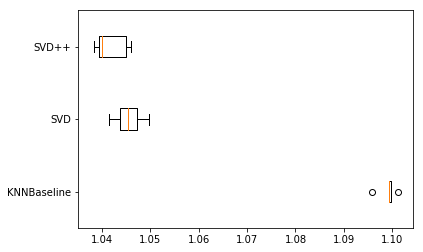

In [12]:
rmse_res = [best_rmse_knn, best_rmse_svd, best_rmse_svdpp]
plt.boxplot(rmse_res, labels = ['KNNBaseline','SVD','SVD++'],vert = False)
plt.show()